In [577]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



data = pd.read_csv("C:\\Users\\joshy\\Downloads\\strokedata.csv")
data.head()
data.describe()


#eda 
missing_values = data.isnull().sum()

# Summary statistics
summary_stats = data.describe(include='all')

# Visualize the distribution of numerical features
numerical_features = ['age','heart_disease','avg_glucose_level','bmi']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Visualize the target variable
sns.countplot(x='stroke', data=data, palette='coolwarm')
plt.title('Stroke Prediction Distribution')
plt.show()

missing_values, summary_stats

# Label encoding each categorical feature
categorical_features = ['gender','ever_married','work_type','Residence_type','smoking_status']

le = LabelEncoder()
for feature in categorical_features:
    data[feature] = le.fit_transform(data[feature])

data.head()

sns.heatmap(data.corr())

# Get required data
data.drop(columns=['bmi'], inplace=True)
data.head()

# Split data into independent/dependent variables
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into test/train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)



#Decision Tree classification with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini',max_depth=4, random_state=42)
dt_gini.fit(X_train, y_train)

#Decision Tree classification with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=42)
dt_entropy.fit(X_train, y_train)

# Predict on test set
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

# Evaluate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

# Evaluation metrics
print("Gini Model Classification Report:\n", classification_report(y_test, y_pred_gini))
print("Entropy Model Classification Report:\n", classification_report(y_test, y_pred_entropy))

# Confusion matrices
confusion_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(confusion_gini, annot=True, fmt='d', cmap='Blues', cbar=False)

confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(confusion_entropy, annot=True, fmt='d', cmap='Blues', cbar=False)

# Separate features and target
X = data.drop(columns=['stroke'])
y = data['stroke']

# Feature Importance
features = X.columns
importances_gini = dt_gini.feature_importances_
importances_entropy = dt_entropy.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Gini Importance': importances_gini,
    'Entropy Importance': importances_entropy
}).sort_values(by='Gini Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)


precision_gini, recall_gini, _ = precision_recall_curve(y_test, y_pred_gini_proba)
precision_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_pred_entropy_proba)

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_gini, precision_gini, label='Gini', linestyle='--', color='blue')
plt.plot(recall_entropy, precision_entropy, label='Entropy', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gini and Entropy Models')
plt.legend()
plt.show()


# Visualize Decision Trees
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=features, class_names=['No stroke', 'stroke'], filled=True)
plt.title('Decision Tree (Gini)')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=features, class_names=['No stroke', 'stroke'], filled=True)
plt.title('Decision Tree (Entropy)')
plt.show()


params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)


plt.figure(figsize=(20,20))
features_names = features
classes = ['No stroke','stroke']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()


params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier(criterion='entropy')
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

# Comparative Analysis
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    'Gini': [metrics_gini[0], metrics_gini[1], metrics_gini[2], auc_gini],
    'Entropy': [metrics_entropy[0], metrics_entropy[1], metrics_entropy[2], auc_entropy]
})

comparison_df


,age,heart_disease,avg_glucose_level,bmi,stroke
count,699.000000,699.000000,699.000000,650.000000,699.000000
mean,51.474449,0.095851,116.691073,29.856615,0.356223
std,22.416010,0.294598,53.197464,8.014465,0.479225
min,0.320000,0.000000,55.250000,12.000000,0.000000
25%,36.000000,0.000000,78.775000,24.425000,0.000000
50%,55.000000,0.000000,96.970000,28.500000,0.000000
75%,71.000000,0.000000,137.850000,34.300000,1.000000
max,82.000000,1.000000,271.740000,71.900000,1.000000


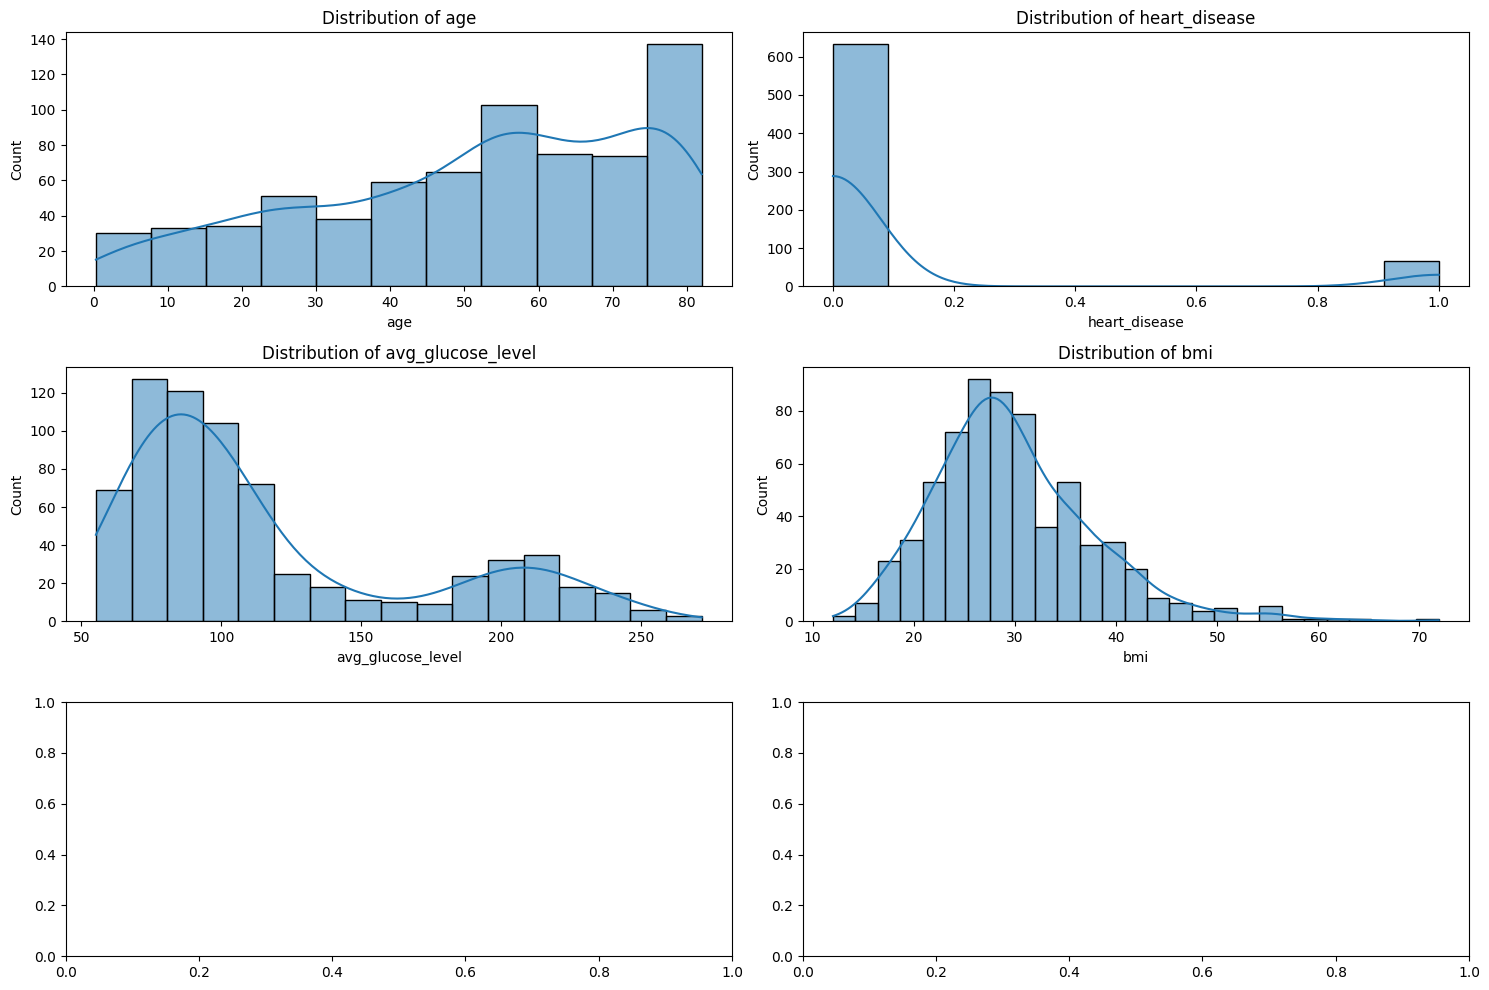

C:\Users\joshy\AppData\Local\Temp\ipykernel_20816\3955518631.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=data, palette='coolwarm')


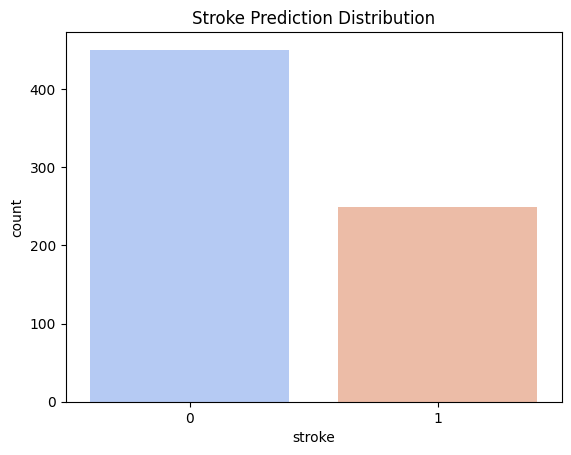

(gender                0
 age                   0
 heart_disease         0
 ever_married          0
 work_type             0
 Residence_type        0
 avg_glucose_level     0
 bmi                  49
 smoking_status        0
 stroke                0
 dtype: int64,
         gender         age  heart_disease ever_married work_type  \
 count      699  699.000000     699.000000          699       699   
 unique       2         NaN            NaN            2         5   
 top     Female         NaN            NaN          Yes   Private   
 freq       413         NaN            NaN          521       410   
 mean       NaN   51.474449       0.095851          NaN       NaN   
 std        NaN   22.416010       0.294598          NaN       NaN   
 min        NaN    0.320000       0.000000          NaN       NaN   
 25%        NaN   36.000000       0.000000          NaN       NaN   
 50%        NaN   55.000000       0.000000          NaN       NaN   
 75%        NaN   71.000000       0.000000   

,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,0,1,3,0,174.12,24.0,2,1


<Axes: >

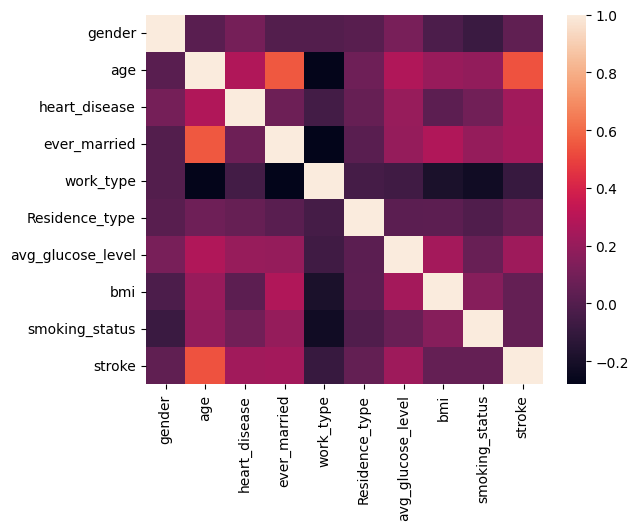

,gender,age,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,1,1,2,1,228.69,1,1
1,0,61.0,0,1,3,0,202.21,2,1
2,1,80.0,1,1,2,0,105.92,2,1
3,0,49.0,0,1,2,1,171.23,3,1
4,0,79.0,0,1,3,0,174.12,2,1


<Axes: >

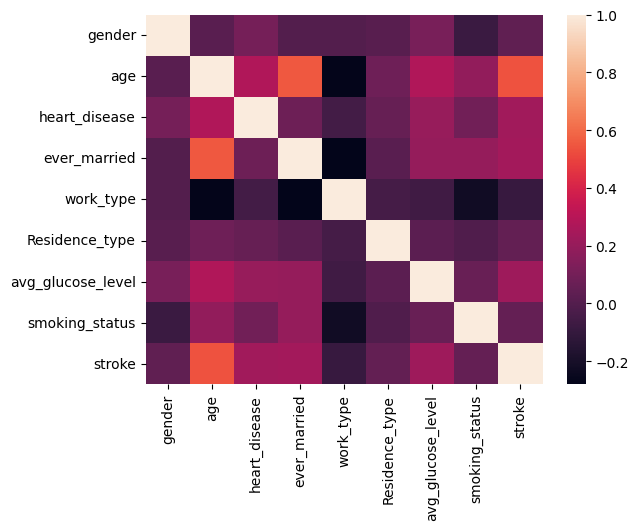

DecisionTreeClassifier(max_depth=4, random_state=42)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [592]:
# Evaluate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.7428571428571429, 0.7257142857142858)

In [593]:
# Evaluation metrics
print("Gini Model Classification Report:\n", classification_report(y_test, y_pred_gini))
print("Entropy Model Classification Report:\n", classification_report(y_test, y_pred_entropy))

Gini Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       110
           1       0.66      0.63      0.65        65

    accuracy                           0.74       175
   macro avg       0.72      0.72      0.72       175
weighted avg       0.74      0.74      0.74       175

Entropy Model Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       110
           1       0.67      0.52      0.59        65

    accuracy                           0.73       175
   macro avg       0.71      0.68      0.69       175
weighted avg       0.72      0.73      0.72       175



<Axes: >

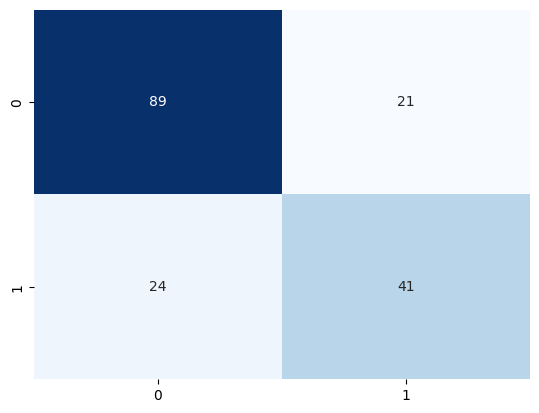

<Axes: >

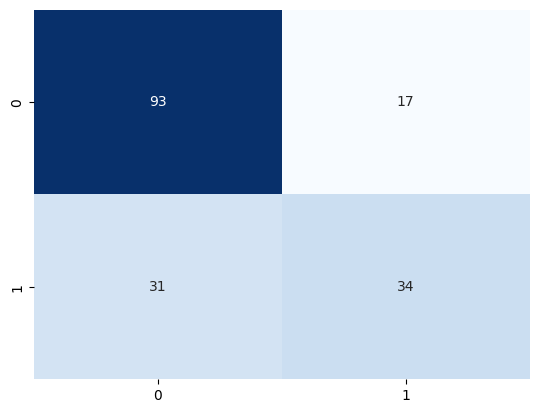

In [595]:
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(confusion_entropy, annot=True, fmt='d', cmap='Blues', cbar=False)

In [596]:
# Separate features and target
X = data.drop(columns=['stroke'])
y = data['stroke']

# Feature Importance
features = X.columns
importances_gini = dt_gini.feature_importances_
importances_entropy = dt_entropy.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Gini Importance': importances_gini,
    'Entropy Importance': importances_entropy
}).sort_values(by='Gini Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
             Feature  Gini Importance  Entropy Importance
1                age         0.833615            0.763882
5  avg_glucose_level         0.119142            0.218907
6     smoking_status         0.047242            0.000000
2      heart_disease         0.000000            0.000000
0             gender         0.000000            0.000000
4     Residence_type         0.000000            0.000000
3       ever_married         0.000000            0.017212


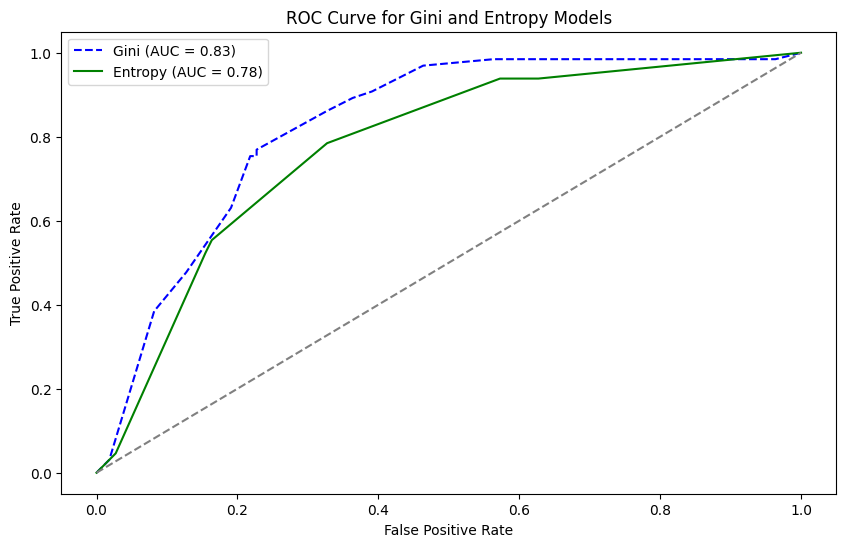

In [597]:
# Metrics calculation
metrics_gini = precision_recall_fscore_support(y_test, y_pred_gini, average='binary')
metrics_entropy = precision_recall_fscore_support(y_test, y_pred_entropy, average='binary')

# AUC scores
y_pred_gini_proba = dt_gini.predict_proba(X_test)[:, 1]
y_pred_entropy_proba = dt_entropy.predict_proba(X_test)[:, 1]
auc_gini = roc_auc_score(y_test, y_pred_gini_proba)
auc_entropy = roc_auc_score(y_test, y_pred_entropy_proba)

# ROC Curve
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini_proba)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy_proba)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label=f'Gini (AUC = {auc_gini:.2f})', linestyle='--', color='blue')
plt.plot(fpr_entropy, tpr_entropy, label=f'Entropy (AUC = {auc_entropy:.2f})', color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gini and Entropy Models')
plt.legend()
plt.show()

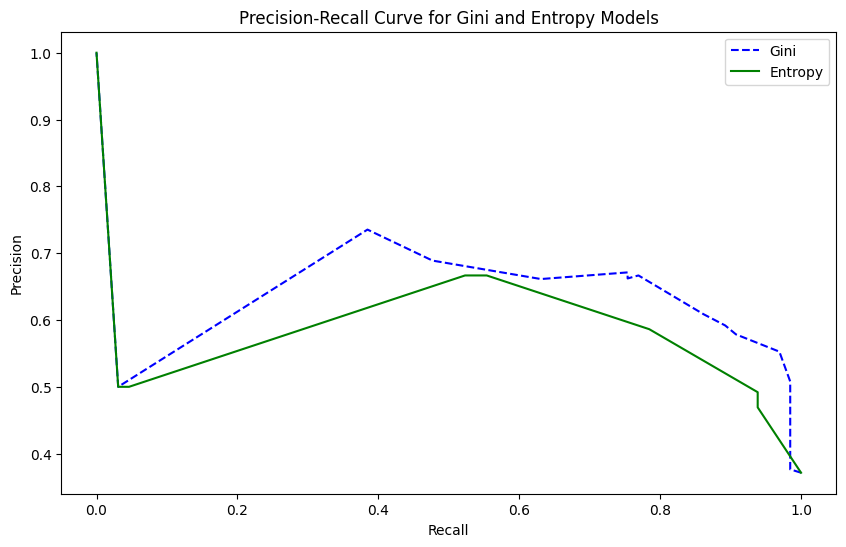

In [598]:
precision_gini, recall_gini, _ = precision_recall_curve(y_test, y_pred_gini_proba)
precision_entropy, recall_entropy, _ = precision_recall_curve(y_test, y_pred_entropy_proba)

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_gini, precision_gini, label='Gini', linestyle='--', color='blue')
plt.plot(recall_entropy, precision_entropy, label='Entropy', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gini and Entropy Models')
plt.legend()
plt.show()

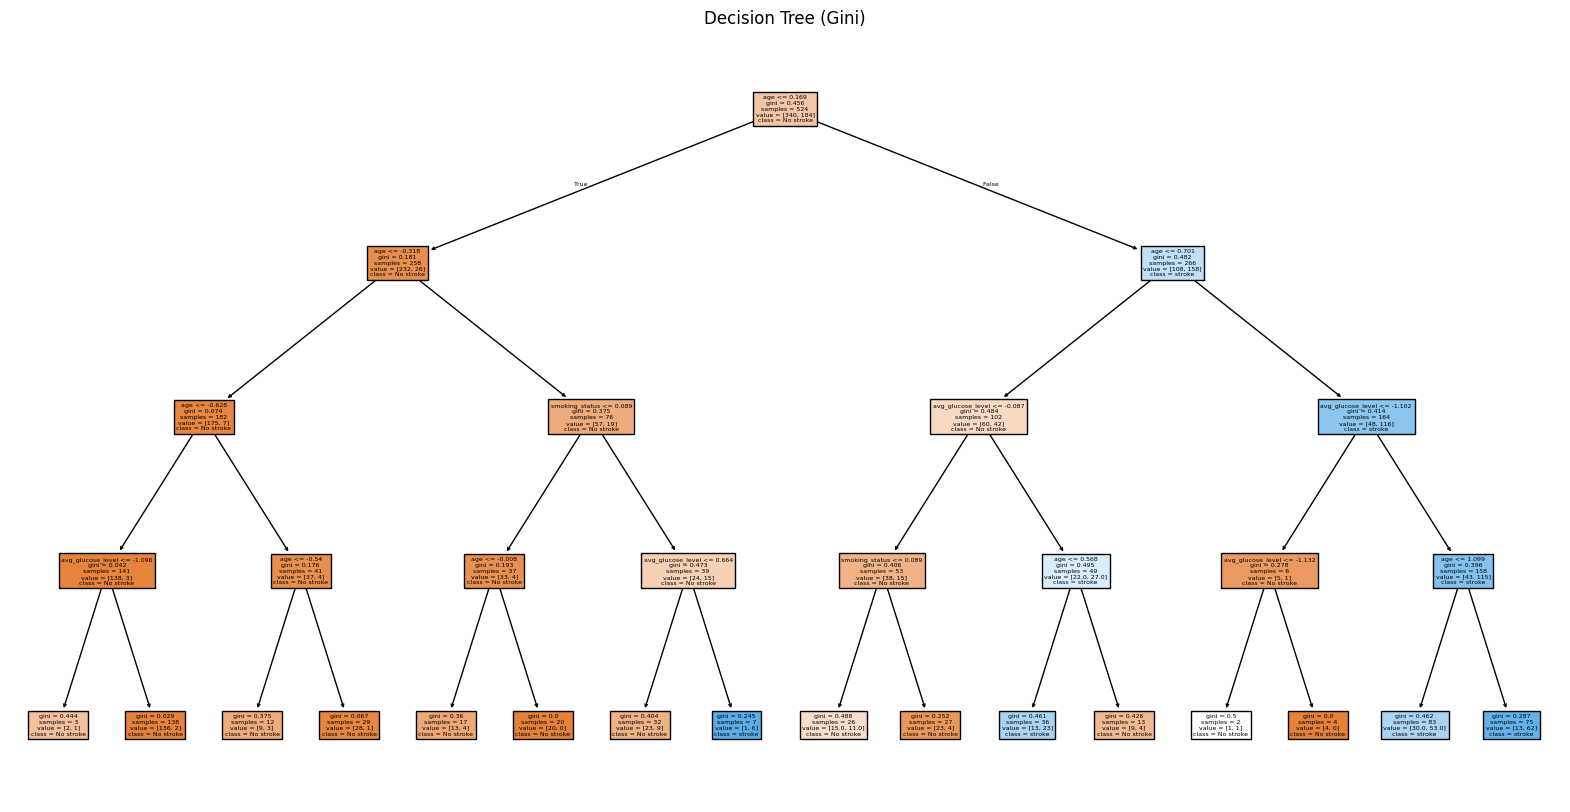

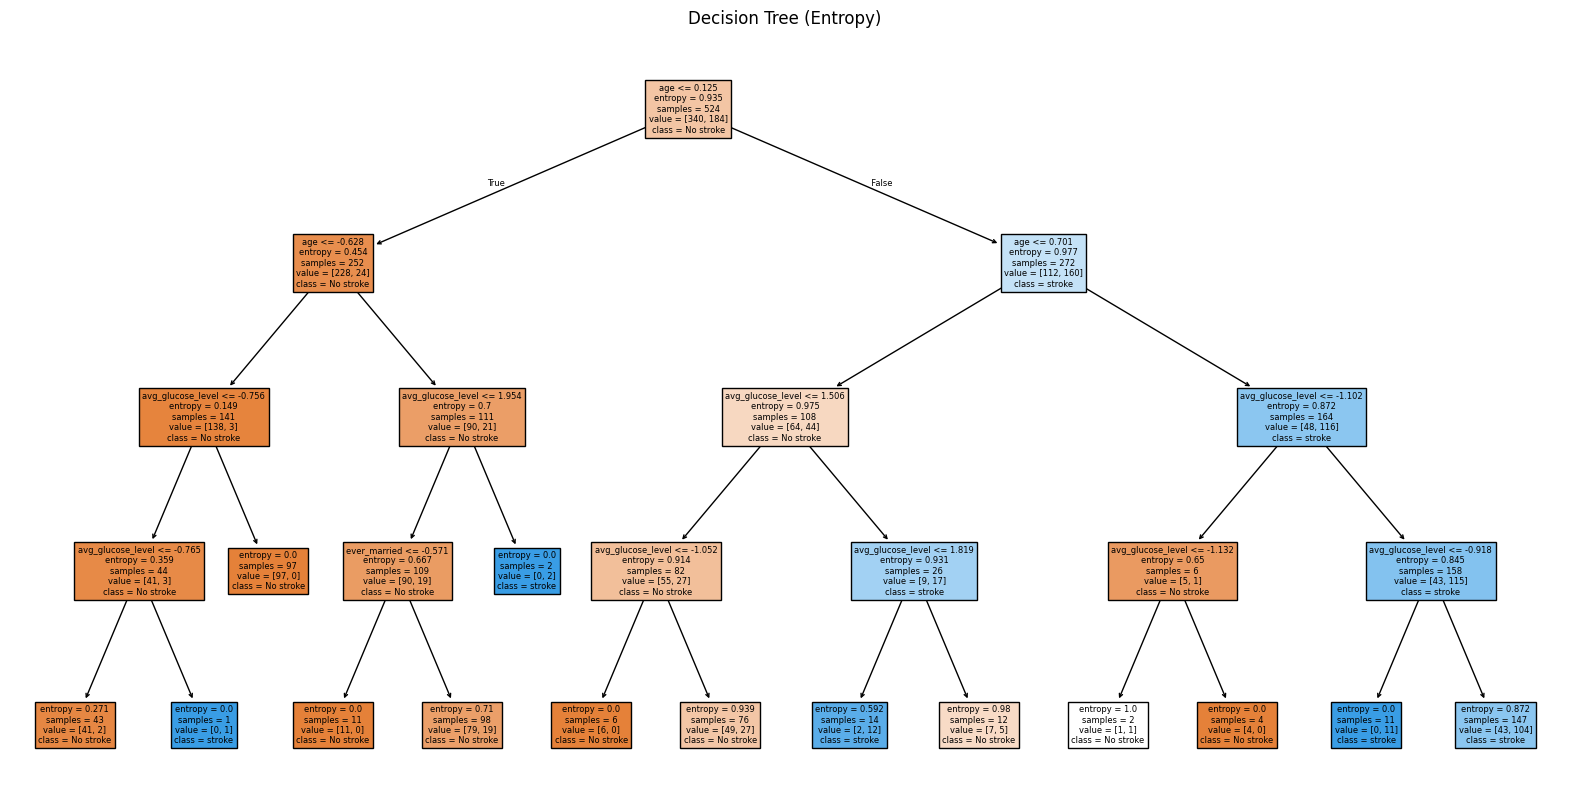

In [599]:
# Visualize Decision Trees
plt.figure(figsize=(20, 10))
plot_tree(dt_gini, feature_names=features, class_names=['No stroke', 'stroke'], filled=True)
plt.title('Decision Tree (Gini)')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=features, class_names=['No stroke', 'stroke'], filled=True)
plt.title('Decision Tree (Entropy)')
plt.show()

In [600]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

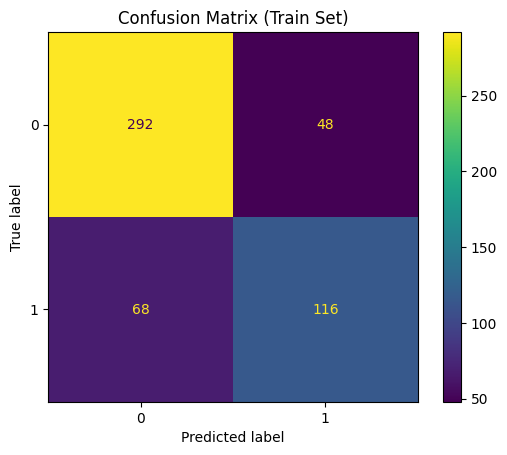

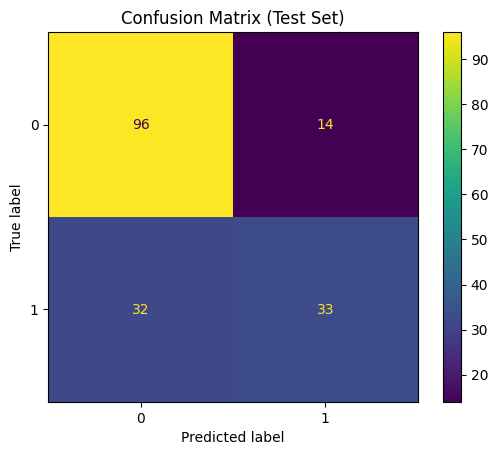

In [601]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Train Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Confusion Matrix (Train Set)')
plt.show()

# Plot Test Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Confusion Matrix (Test Set)')
plt.show()


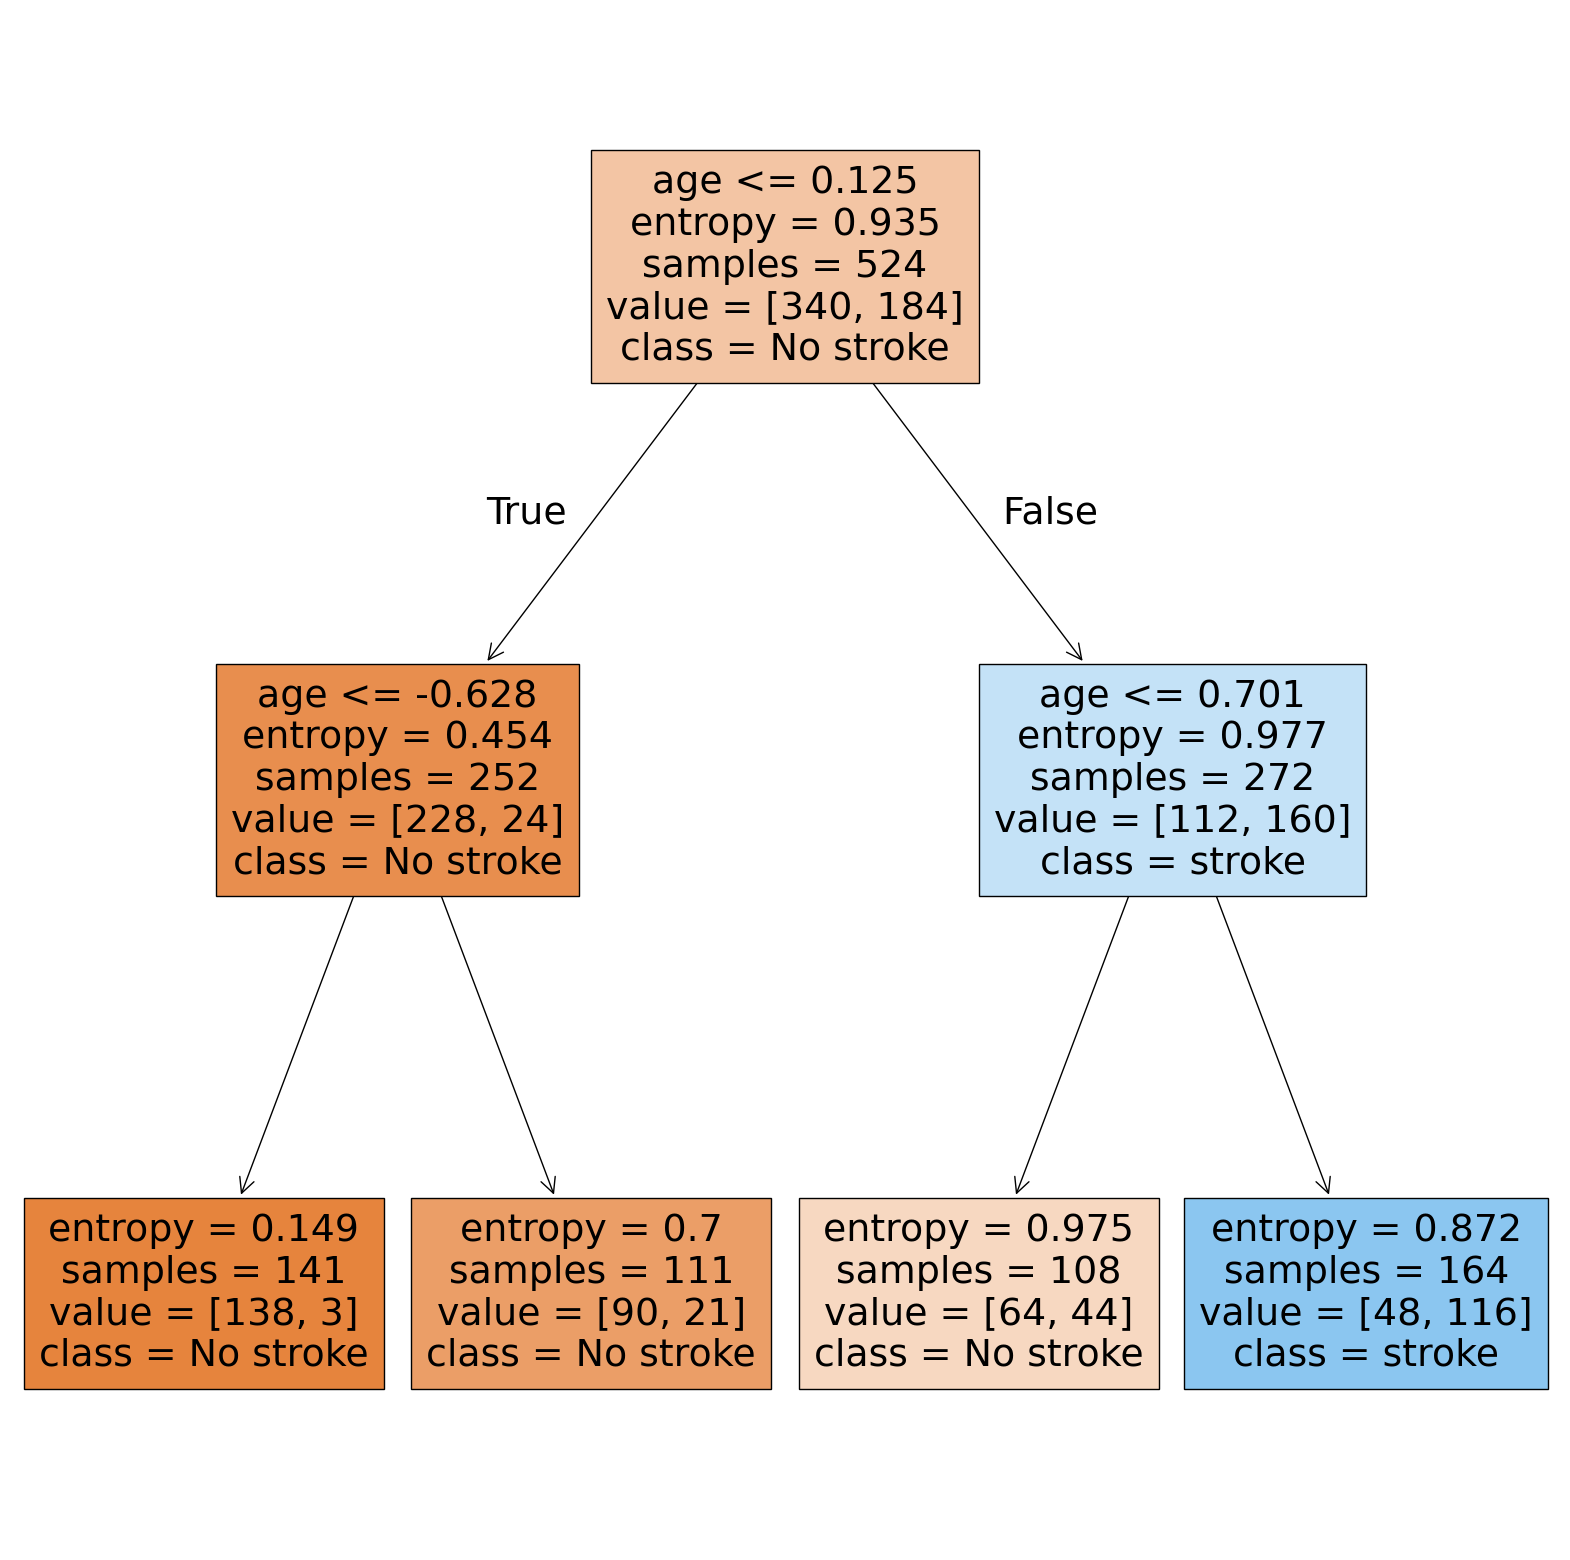

In [602]:
plt.figure(figsize=(20,20))
features_names = features
classes = ['No stroke','stroke']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

In [603]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier(criterion='entropy')
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train,y_train)


GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score: 0.7786259541984732
Test score: 0.7371428571428571


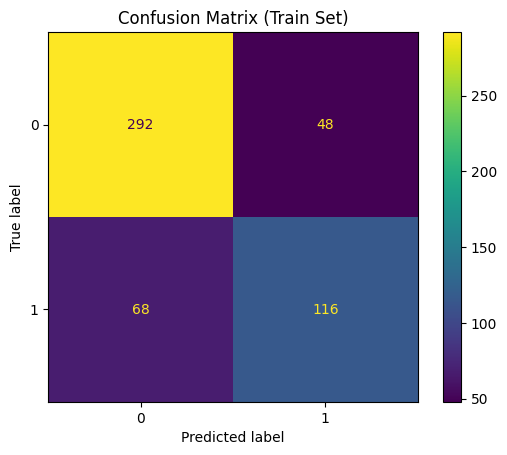

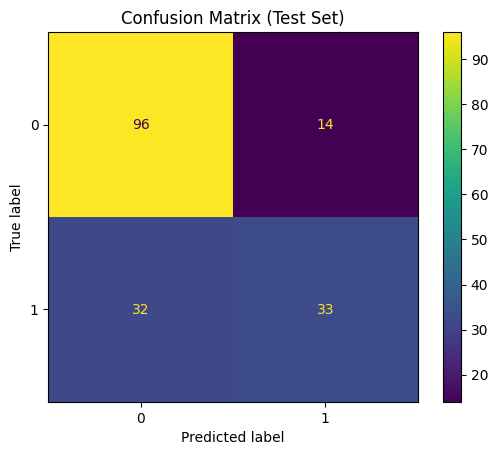

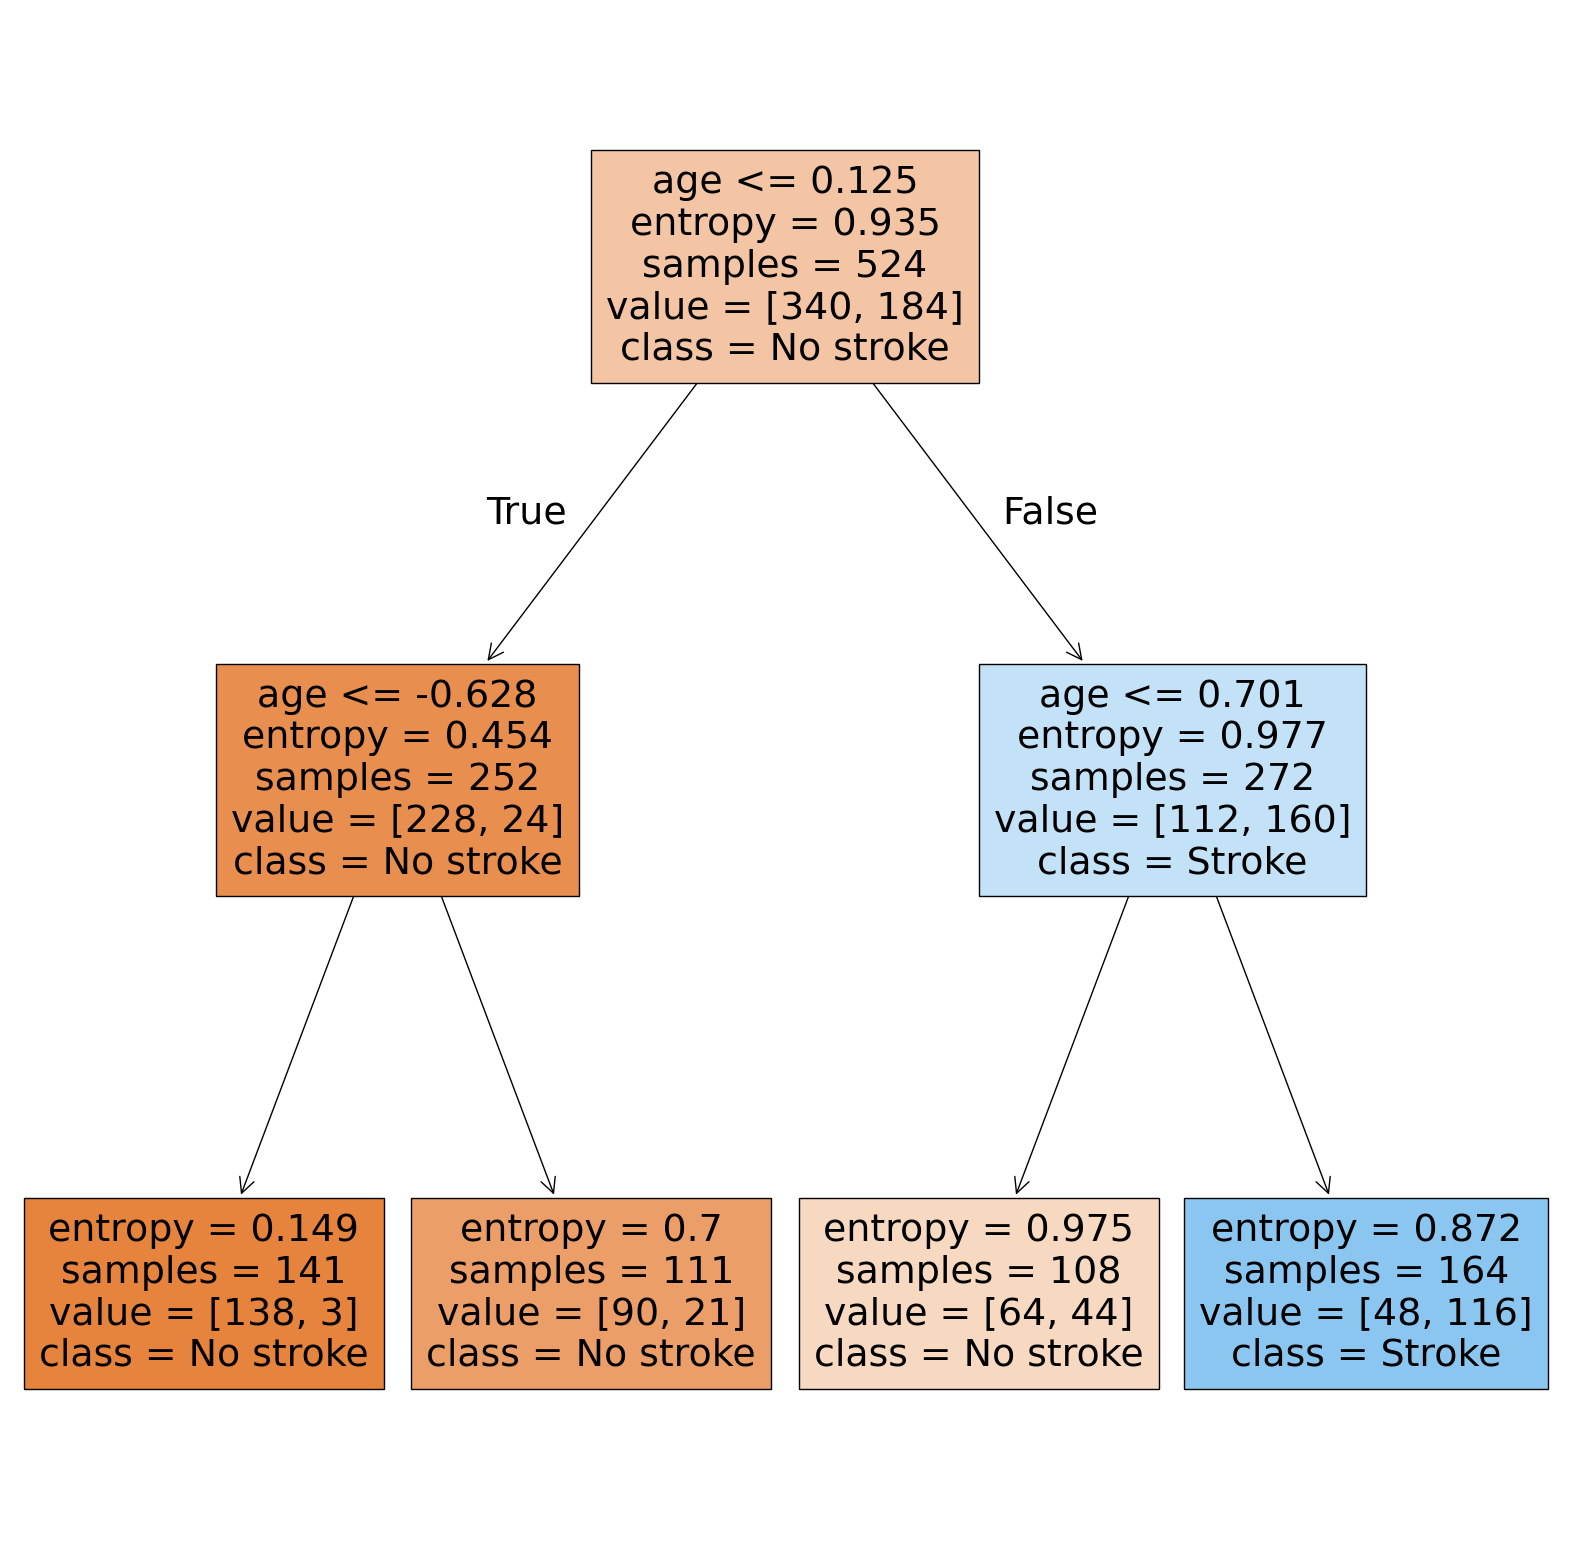

In [607]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 20))
classes = ['No stroke', 'Stroke']
tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)
plt.show()

In [608]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the pruning path
path = tree.DecisionTreeClassifier(random_state=0).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Display the alpha values
print("CCP Alphas:", ccp_alphas)


CCP Alphas: [0.         0.00075766 0.00118745 0.0014313  0.00152672 0.00159033
 0.00159033 0.00159033 0.00159033 0.00163577 0.00163577 0.00163577
 0.00163577 0.00166985 0.00171756 0.00171756 0.00173491 0.00179614
 0.00184024 0.00184259 0.00185461 0.00186458 0.00194085 0.00198791
 0.00203562 0.00212044 0.00215448 0.00218103 0.0023855  0.00243268
 0.00245365 0.00254453 0.00263049 0.00272628 0.00274026 0.0028626
 0.0028626  0.00289405 0.00294637 0.00297021 0.00305344 0.00313441
 0.0031377  0.00314885 0.0038123  0.00382121 0.00383383 0.00401261
 0.00424824 0.00444015 0.00560619 0.00640561 0.00694816 0.00697983
 0.00915678 0.02096669 0.12159959]


In [609]:
# For each alpha, train a decision tree and append to the list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Remove the last tree as it may be a trivial one with no splits
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]


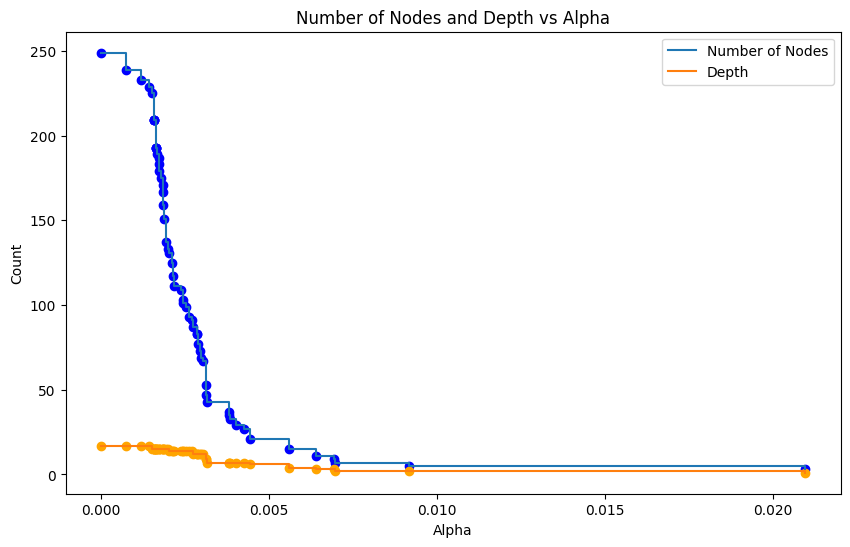

In [610]:
# Collect node counts and depths for visualization
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

# Plot nodes and depths vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, node_counts, label="Number of Nodes", drawstyle="steps-post")
plt.plot(ccp_alphas, depth, label="Depth", drawstyle="steps-post")
plt.scatter(ccp_alphas, node_counts, color="blue")
plt.scatter(ccp_alphas, depth, color="orange")
plt.xlabel("Alpha")
plt.ylabel("Count")
plt.title("Number of Nodes and Depth vs Alpha")
plt.legend()
plt.show()


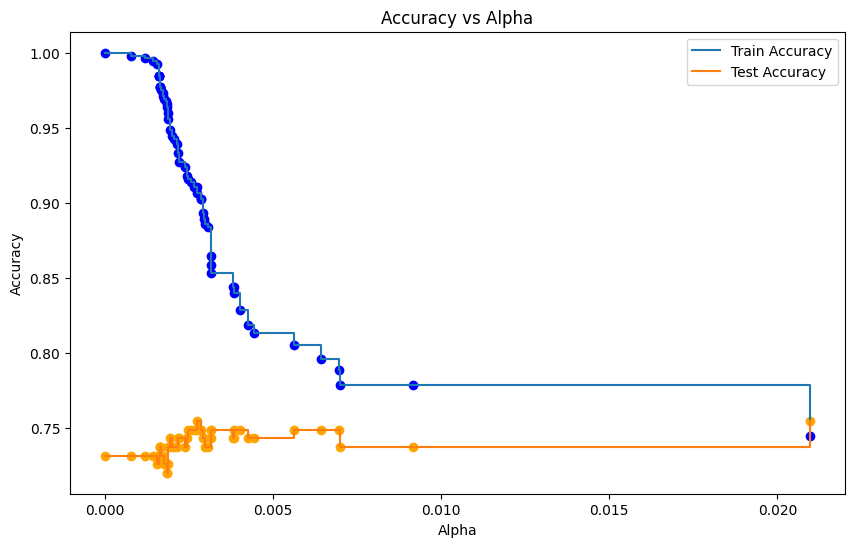

In [611]:
# Evaluate accuracy for each pruned tree
train_acc = []
test_acc = []

for clf in clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_acc, label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label="Test Accuracy", drawstyle="steps-post")
plt.scatter(ccp_alphas, train_acc, color="blue")
plt.scatter(ccp_alphas, test_acc, color="orange")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.legend()
plt.show()


Train score: 0.7786259541984732
Test score: 0.7371428571428571


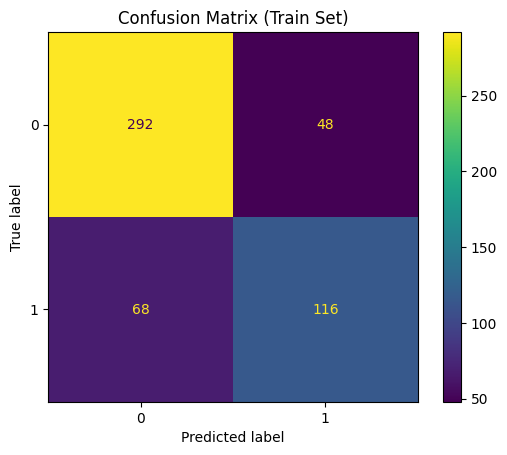

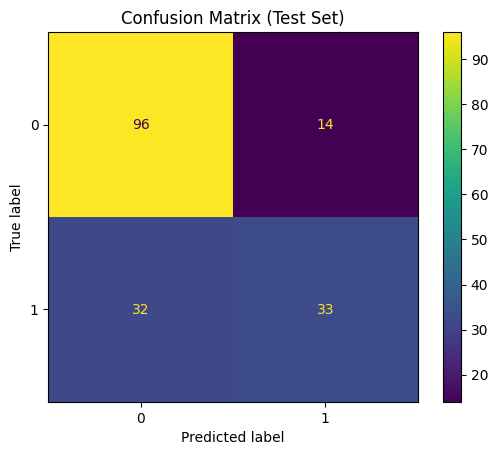

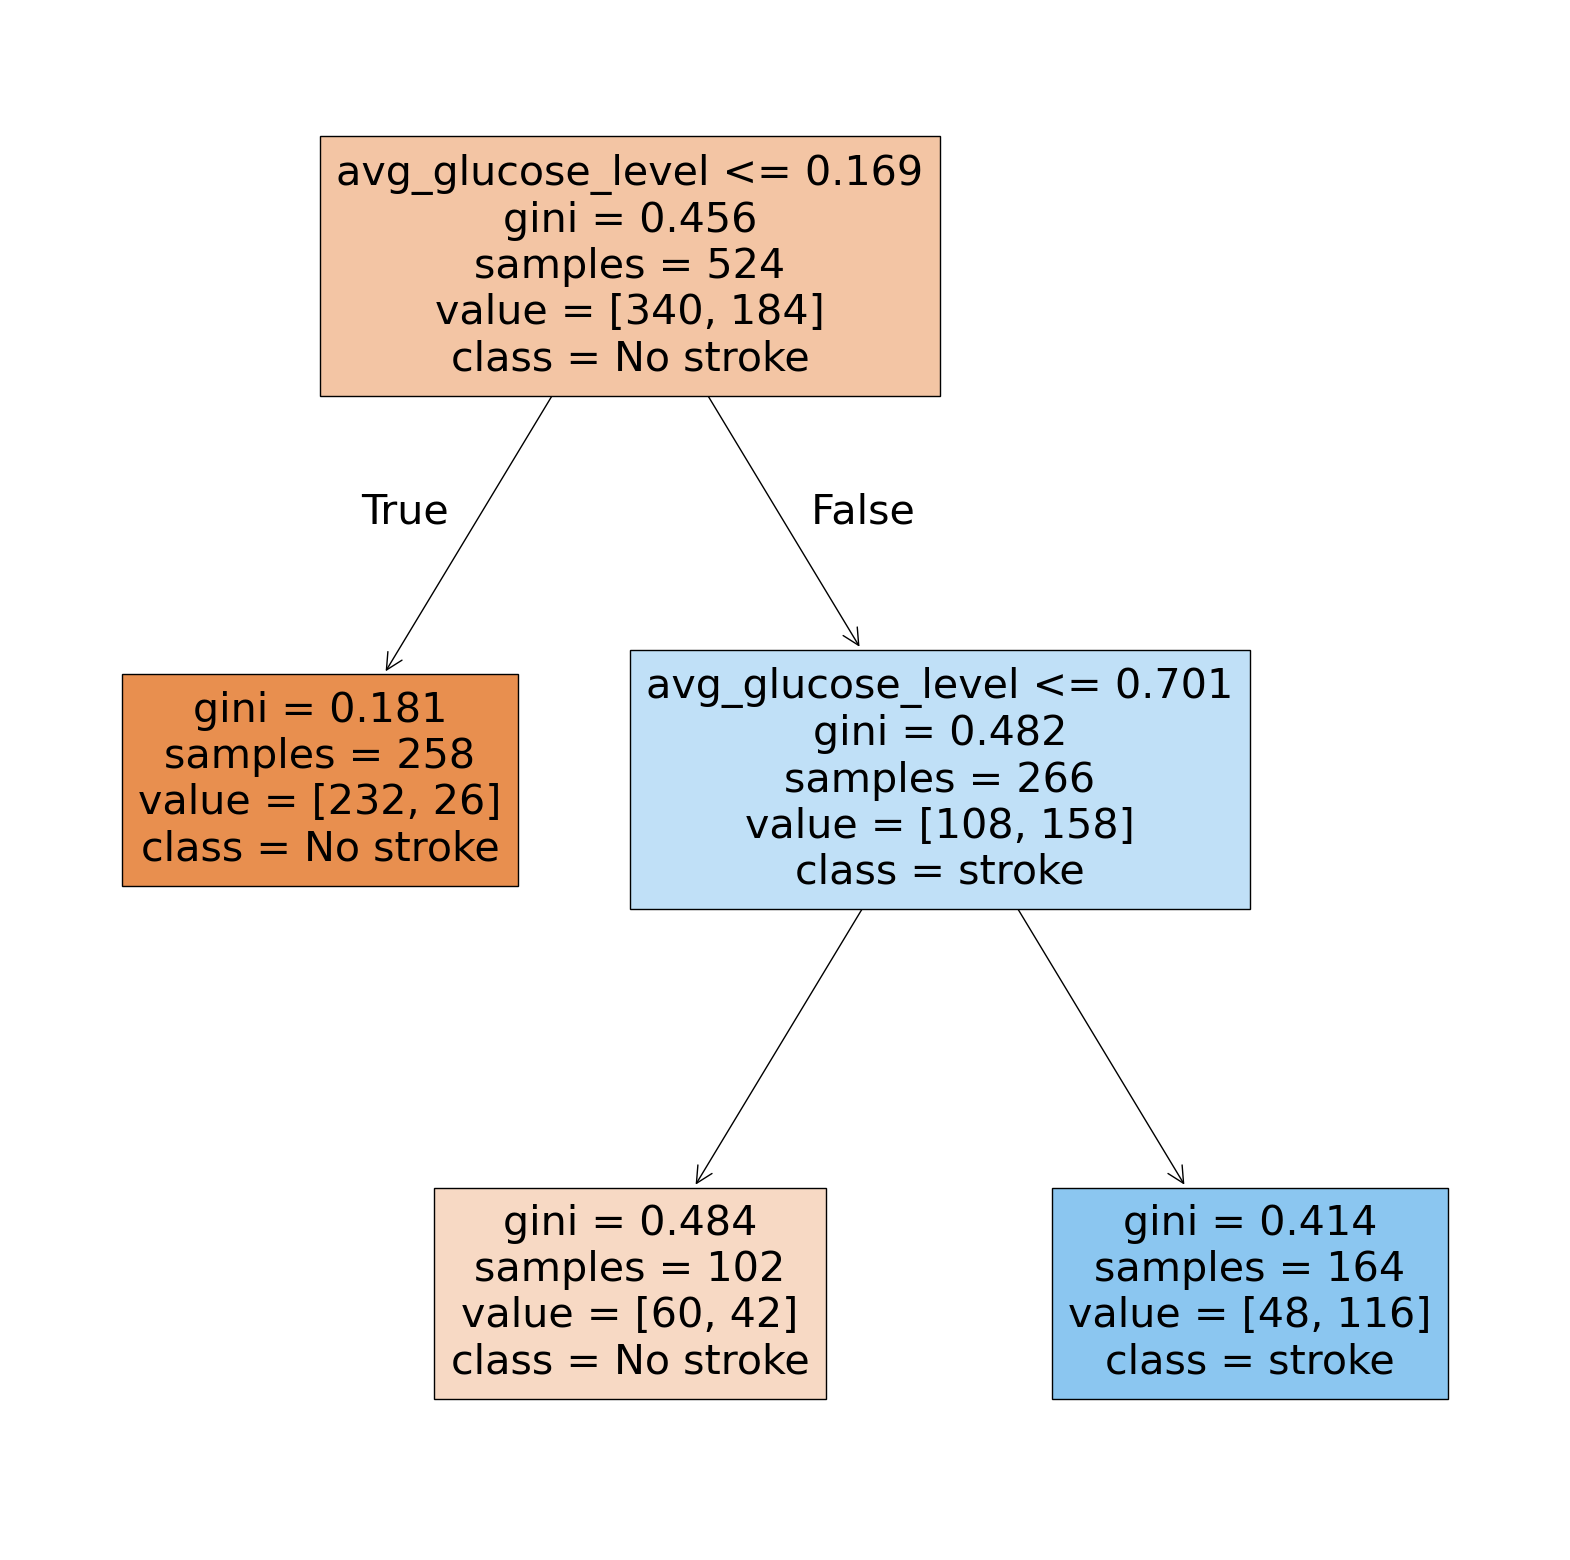

CCP Alphas: [0.         0.00276623 0.0028626  0.00308827 0.00309648 0.00328376
 0.00344431 0.00344431 0.00367121 0.0037215  0.00381679 0.00381679
 0.00381679 0.00381679 0.00401276 0.00447693 0.00459247 0.00478172
 0.00482696 0.00485321 0.00499789 0.00522644 0.00525742 0.00525742
 0.00536815 0.00540563 0.00546559 0.00562121 0.00605364 0.00607945
 0.00610163 0.00621206 0.00649905 0.00679514 0.007443   0.00748703
 0.00788305 0.00792633 0.00839585 0.00938936 0.00981871 0.01165745
 0.01174638 0.02999298 0.03341652 0.20952514]


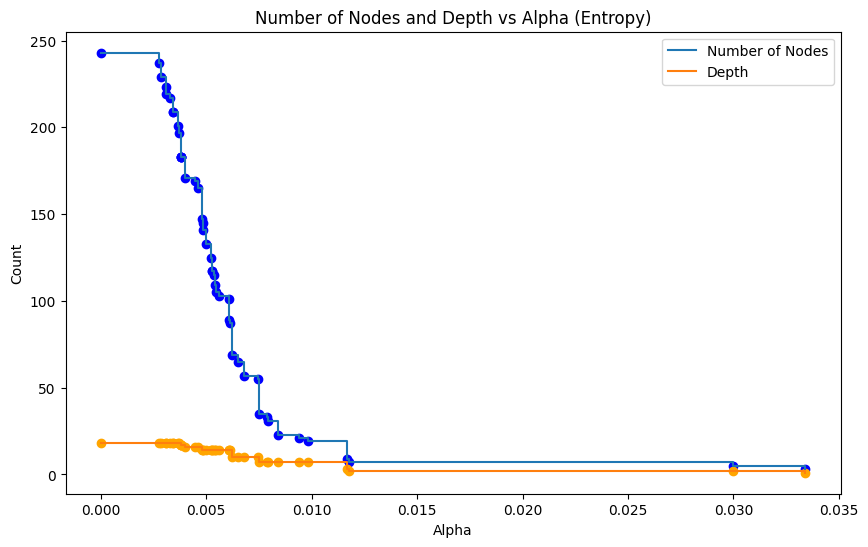

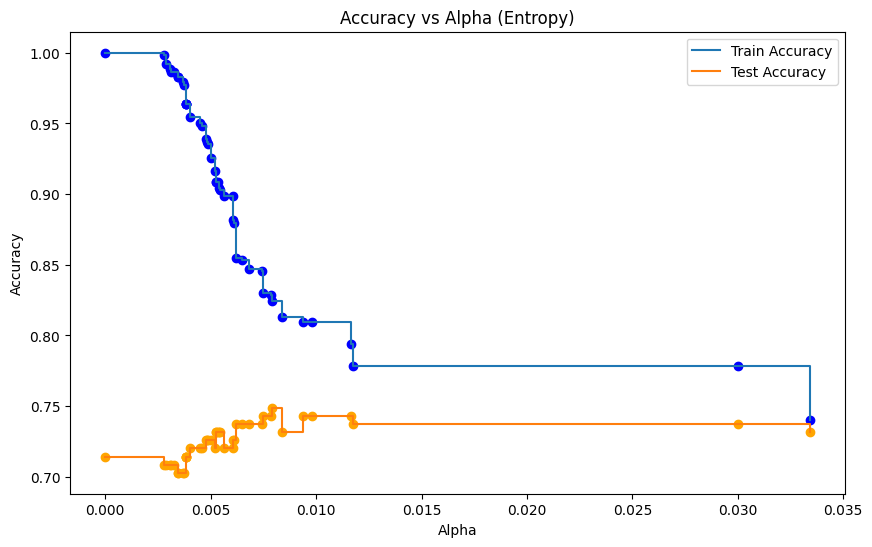

Train score: 0.7786259541984732
Test score: 0.7371428571428571


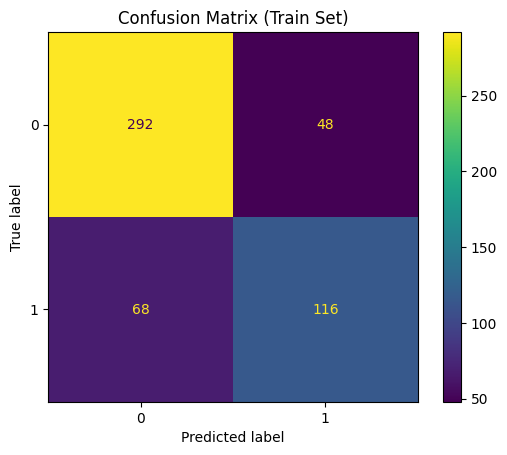

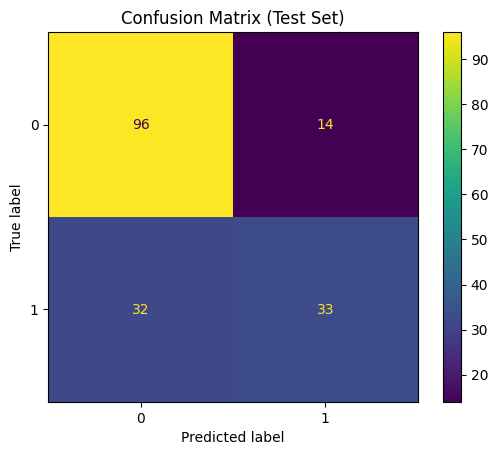

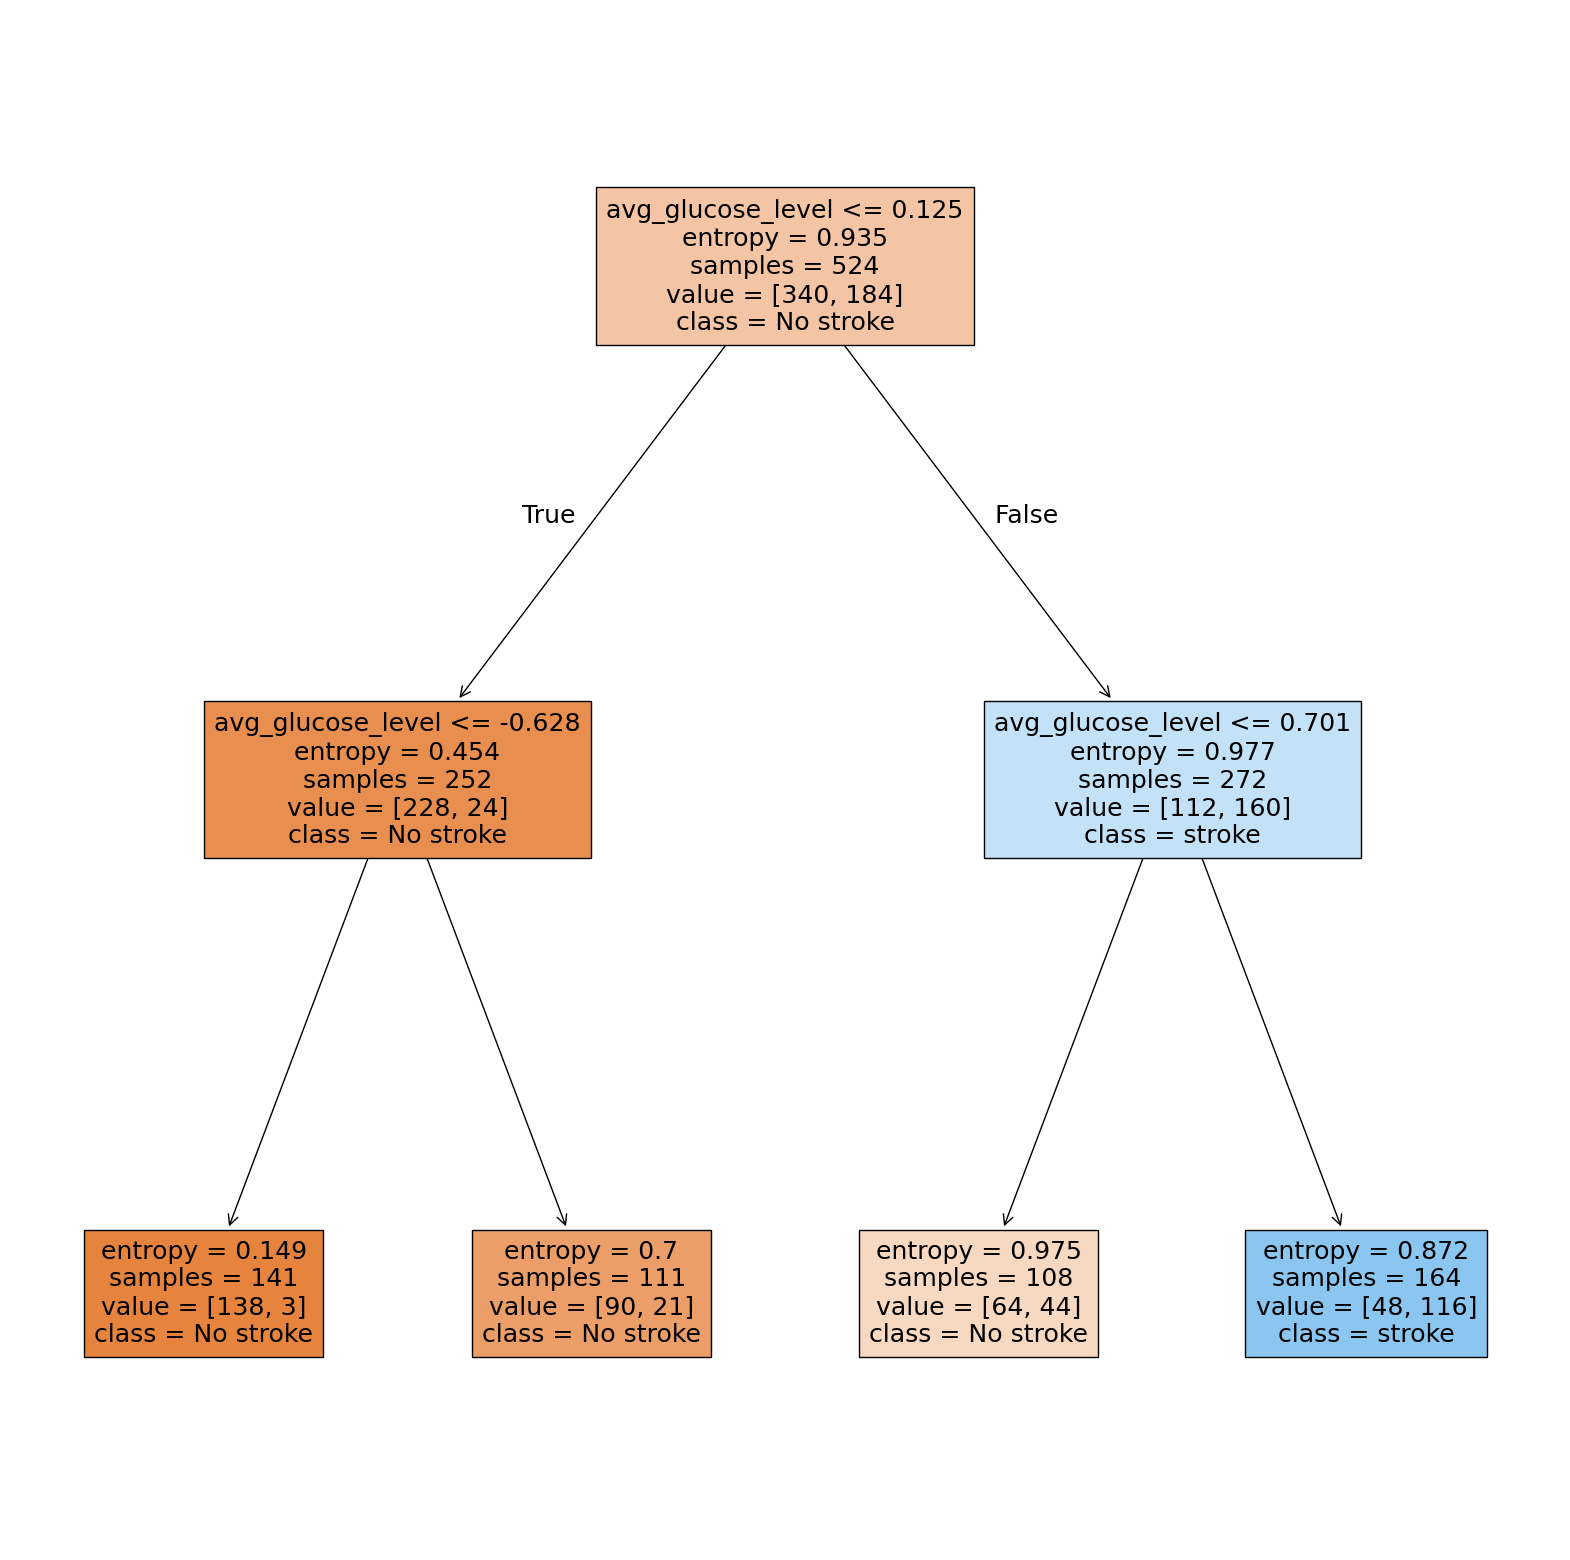

In [620]:
# Comparative Analysis
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'AUC'],
    'Gini': [metrics_gini[0], metrics_gini[1], metrics_gini[2], auc_gini],
    'Entropy': [metrics_entropy[0], metrics_entropy[1], metrics_entropy[2], auc_entropy]
})

comparison_df

,Metric,Gini,Entropy
0,Precision,0.661290,0.666667
1,Recall,0.630769,0.523077
2,F1-Score,0.645669,0.586207
3,AUC,0.827902,0.775175


In [621]:
#Gini performs better overall as it has superior values for Recall, F1-Score, and AUC.
#Entropy has bettter precision than Gini